# Checking Different Sampling Rates for June 15th Flight Data

## Goal:
Determine sampling rate which preserves quality of data, for all recorded parameters from Pixhawk

In [1]:
import sys
sys.path.append('../')

%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.io

import main
from main import flight
from main import analysis
import propellers
import motors
from aircraft import airplane
import cl_finders

In [2]:
## Pickling that DF for Later ##

#df.to_pickle("./data/june15_2022.pkl")

## Unpickling 
df_100Hz = pd.read_pickle("../data/june15_2022_100Hz.pkl")
df_60Hz = pd.read_pickle("../data/june15_2022_60Hz.pkl")
df_1Hz = pd.read_pickle("../data/june15_2022_1Hz.pkl")

df = df_1Hz.interpolate(method="linear")

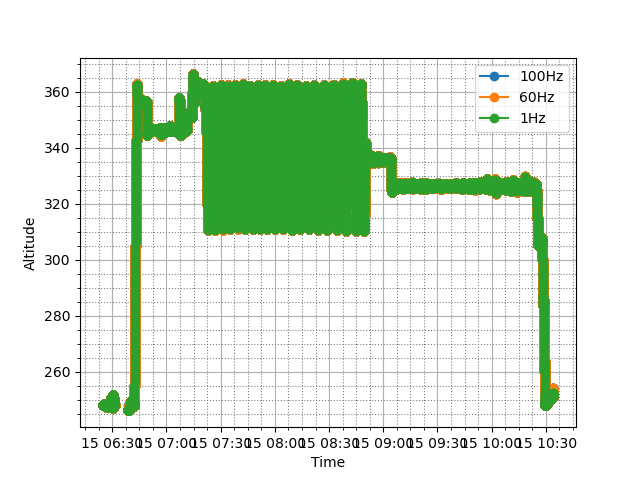

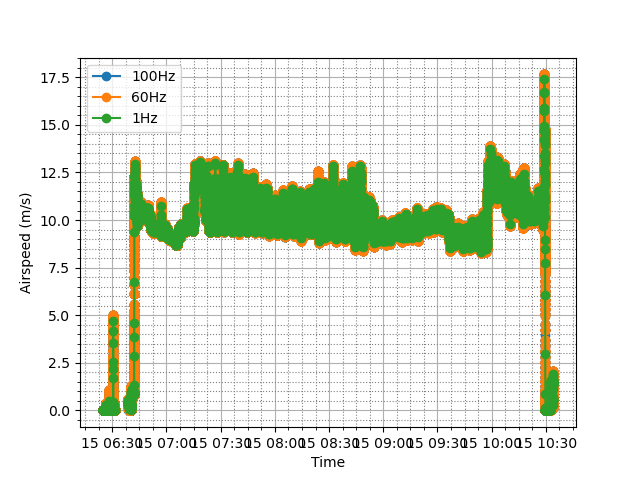

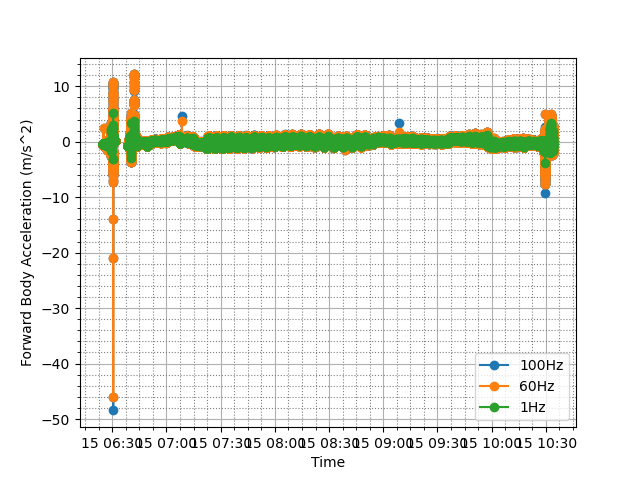

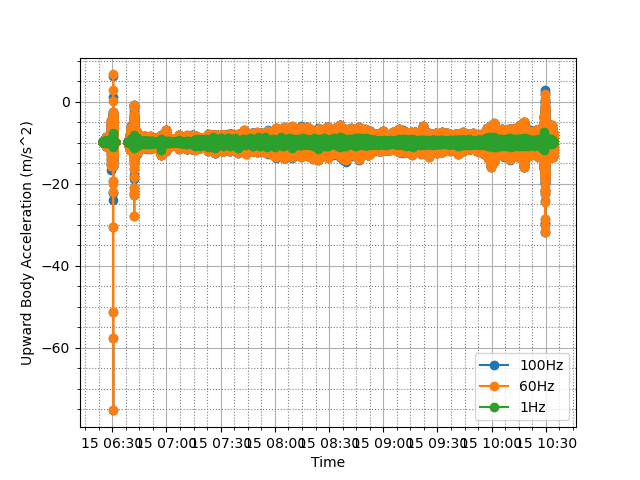

In [3]:
# Comparison of Sampling Rate Changes:

plt.figure()
plt.plot(df_100Hz.index, df_100Hz["Altitude"], linestyle=None, marker='o', label='100Hz')
plt.plot(df_60Hz.index, df_60Hz["Altitude"], linestyle=None, marker='o', label='60Hz')
plt.plot(df_1Hz.index, df_1Hz["Altitude"], linestyle=None, marker='o', label='1Hz')
plt.legend()
plt.grid(True)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':', color='grey')
plt.minorticks_on()
plt.xlabel("Time")
plt.ylabel("Altitude")
plt.show()

plt.figure()
plt.plot(df_100Hz.index, df_100Hz["Airspeed"], linestyle=None, marker='o', label='100Hz')
plt.plot(df_60Hz.index, df_60Hz["Airspeed"], linestyle=None, marker='o', label='60Hz')
plt.plot(df_1Hz.index, df_1Hz["Airspeed"], linestyle=None, marker='o', label='1Hz')
plt.legend()
plt.grid(True)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':', color='grey')
plt.minorticks_on()
plt.xlabel("Time")
plt.ylabel("Airspeed (m/s)")
plt.show()

plt.figure()
plt.plot(df_100Hz.index, df_100Hz["XAcc_IMU"], linestyle=None, marker='o', label='100Hz')
plt.plot(df_60Hz.index, df_60Hz["XAcc_IMU"], linestyle=None, marker='o', label='60Hz')
plt.plot(df_1Hz.index, df_1Hz["XAcc_IMU"], linestyle=None, marker='o', label='1Hz')
plt.legend()
plt.grid(True)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':', color='grey')
plt.minorticks_on()
plt.xlabel("Time")
plt.ylabel("Forward Body Acceleration (m/s^2)")
plt.show()

plt.figure()
plt.plot(df_100Hz.index, df_100Hz["ZAcc_IMU"], linestyle=None, marker='o', label='100Hz')
plt.plot(df_60Hz.index, df_60Hz["ZAcc_IMU"], linestyle=None, marker='o', label='60Hz')
plt.plot(df_1Hz.index, df_1Hz["ZAcc_IMU"], linestyle=None, marker='o', label='1Hz')
plt.legend()
plt.grid(True)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':', color='grey')
plt.minorticks_on()
plt.xlabel("Time")
plt.ylabel("Upward Body Acceleration (m/s^2)")
plt.show()

From the plots before, 60 Hz looks sufficient to sample the highest sampled sensors.  In this case the IMU which samples at an average rate of 52 Hz.  However, in order to prevent aliasing, we will sample at twice that, based on the Nyquist Rate. 

Sampling rate of 100Hz is best.  